Optimization failed
Method:  constant 	x =  [ 0.0066 -0.0001]
Method:  armijo 	x =  [ 0. -0.]
Method:  wolfe 	x =  [ 0. -0.]
Optimization failed
Iterations: 500
Solution [ 0.00663311 -0.00014733]


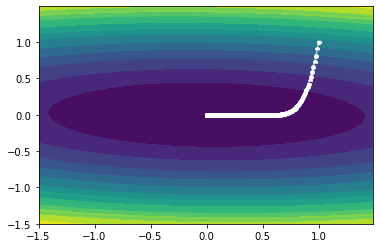

Iterations: 94
Solution [7.46883662e-11 4.81677412e-12]


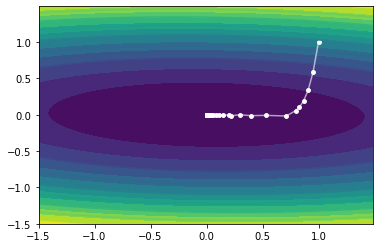

Iterations: 74
Solution [ 4.96924351e-11 -1.26447071e-13]


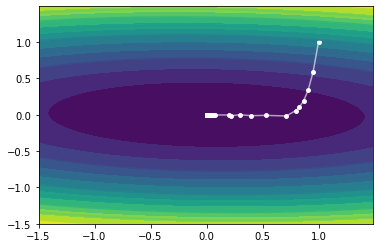

In [10]:
#Saurav Adhikari - 1622912
#Lalita Awasthi - 1622924
#Nila Ravindran - 1614113

#importing necessary modules
import numpy as np

from graddesc_test import *


#implementing a method constant to simply return the constant step size
def constant(alpha = 0.001,**kwargs):
    return alpha

#Implementing back tracking line search with ro,c values = (0,1) and alpha>0
def armijo(f,x,gradient,descent,ro = 0.4,c=0.7,alpha=1,**kwargs):
   #Implementingf f(x)
    function_of_x = f(x)

   #for backtracking tracking search the stopping condition is f(x + alpha * descend) <= f(x) + c * alpha * gradient * descent
    while f(x + alpha * descent) > function_of_x + c* alpha * gradient.dot(descent):

        alpha = alpha * ro

    return alpha


#Implementing the wolfe line search algorithm: since there are two conditions we are taking c1 and c2
def wolfe(f,x,gradient,descent, ro = 0.4, c1= 0.2,c2 = 0.4, alpha = 1,**kwargs):
    #Implementingf f(x)
    function_of_x = f(x)

    #a parameter to check if the condition is violated or not
    iteration_pointer = True

    while iteration_pointer:
        phi_t= grad(f,x+alpha*descent)

        #first condition of min decrease for wolfe duality
        is_min_decrease = f(x + alpha * descent) < function_of_x + c1*alpha *gradient.dot(descent)

        #second condition for curvature of wolfe duality
        is_curavute = phi_t.dot(descent) > c2*gradient.dot(descent)

        iteration_pointer = not(is_min_decrease and is_curavute)
        alpha = alpha * ro
    return  alpha



def gradientdescent(f,x,tol=1e-9,maxit=500,callback = None,method= armijo):
    if method=="constant":
        search_algo = constant
    elif method=="armijo":
        search_algo=armijo
    elif method=="wolfe":
        search_algo = wolfe
    else:
        print("invalid method name")

    for i in range(maxit):
        gradient = grad(f,x)

        alpha = search_algo(f = f,x = x,gradient = gradient,descent = -gradient)

        if not callback is None:
            callback(x)

        x = x-alpha*gradient

        norm = np.linalg.norm(gradient)
        if norm < tol:
            return x

    print("Optimization failed")
    return x

if __name__ == '__main__':
    test(gradientdescent)

    #callback for constant method
    callback = CallBack()
    x0 = np.ones(2)
    gradientdescent(f,x0,callback = callback,method= "constant")
    print("Number of Iterations:",len(callback.xk))
    print("Solution xk",callback.xk[-1])
    callback.plot(f)

    #callback for armijo method
    callback = CallBack()
    x0 = np.ones(2)
    gradientdescent(f,x0,callback = callback,method= "armijo")
    print("Number of Iterations:",len(callback.xk))
    print("Solution xk",callback.xk[-1])
    callback.plot(f)

    #callback for wolfe method
    callback = CallBack()
    x0 = np.ones(2)
    gradientdescent(f,x0,callback = callback,method= "wolfe")
    print("Number of Iterations:",len(callback.xk))
    print("Solution xk",callback.xk[-1])
    callback.plot(f)
